# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/ellis/Downloads/output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#API Calls. 

url = "http://api.openweathermap.org/data/2.5/weather?"

city_name_list = []
temperature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
max_temp_list = []
lat_list = []
lng_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities: 
    try:
        query_url = url + "appid=" + weather_api + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url).json()
        print(f"Processing Record {cities.index(city) + 1} of Set 1 | {city}")
        lng = weather_response['coord']['lon']
        city_name_list.append(weather_response['name'])
        temperature_list.append(weather_response['main']['temp'])
        cloudiness_list.append(weather_response['clouds']['all'])
        wind_speed_list.append(weather_response['wind']['speed'])
        date_list.append(weather_response['dt'])
        country_list.append(weather_response['sys']['country'])
        max_temp_list.append(weather_response['main']['temp_max'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        humidity_list.append(weather_response['main']['humidity'])
    except KeyError:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | aflu
City not found. Skipping...
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | turukhansk
Processing Record 4 of Set 1 | kulu
Processing Record 5 of Set 1 | victor harbor
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | porto santo
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | concepcion del oro
Processing Record 10 of Set 1 | davila
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | ngunguru
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | lefka
Processing Record 18 of Set 1 | avera
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | chuy
Proce

Processing Record 179 of Set 1 | bubaque
Processing Record 180 of Set 1 | san ramon de la nueva oran
Processing Record 181 of Set 1 | moses lake
Processing Record 182 of Set 1 | pochutla
Processing Record 183 of Set 1 | san cristobal
Processing Record 184 of Set 1 | inuvik
Processing Record 185 of Set 1 | mbaiki
Processing Record 186 of Set 1 | biltine
Processing Record 187 of Set 1 | portland
Processing Record 188 of Set 1 | ostrovnoy
Processing Record 189 of Set 1 | leshan
City not found. Skipping...
Processing Record 190 of Set 1 | hasaki
Processing Record 191 of Set 1 | pacifica
Processing Record 192 of Set 1 | barrow
Processing Record 193 of Set 1 | waddan
Processing Record 194 of Set 1 | maidens
Processing Record 195 of Set 1 | nouadhibou
Processing Record 196 of Set 1 | lompoc
Processing Record 197 of Set 1 | half moon bay
Processing Record 198 of Set 1 | saint-pierre
Processing Record 199 of Set 1 | boende
Processing Record 200 of Set 1 | torbay
Processing Record 201 of Set 1 |

Processing Record 357 of Set 1 | chapais
Processing Record 358 of Set 1 | naze
Processing Record 359 of Set 1 | hobyo
Processing Record 360 of Set 1 | salalah
Processing Record 361 of Set 1 | saint-augustin
Processing Record 362 of Set 1 | havelock
Processing Record 363 of Set 1 | san vicente de canete
Processing Record 364 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 365 of Set 1 | rawson
Processing Record 366 of Set 1 | izvestkovyy
Processing Record 367 of Set 1 | gisborne
Processing Record 368 of Set 1 | ixtapa
Processing Record 369 of Set 1 | la primavera
Processing Record 370 of Set 1 | port pirie
Processing Record 371 of Set 1 | ransang
City not found. Skipping...
Processing Record 372 of Set 1 | douglas
Processing Record 373 of Set 1 | olafsvik
City not found. Skipping...
Processing Record 374 of Set 1 | zhangye
Processing Record 375 of Set 1 | canico
Processing Record 376 of Set 1 | pathein
Processing Record 377 of Set 1 | tokur
Processing Rec

Processing Record 535 of Set 1 | caucaia
Processing Record 536 of Set 1 | westport
Processing Record 537 of Set 1 | mao
Processing Record 538 of Set 1 | kusk
City not found. Skipping...
Processing Record 539 of Set 1 | takahagi
Processing Record 540 of Set 1 | liwale
Processing Record 541 of Set 1 | upington
Processing Record 542 of Set 1 | moindou
Processing Record 543 of Set 1 | bosaso
Processing Record 544 of Set 1 | aqtobe
Processing Record 545 of Set 1 | aykhal
Processing Record 546 of Set 1 | yulara
Processing Record 547 of Set 1 | rudnogorsk
Processing Record 548 of Set 1 | bellavista
Processing Record 549 of Set 1 | tecolutla
Processing Record 550 of Set 1 | san quintin
Processing Record 551 of Set 1 | tahe
Processing Record 552 of Set 1 | surop
City not found. Skipping...
Processing Record 553 of Set 1 | kasama
Processing Record 554 of Set 1 | hambantota
Processing Record 555 of Set 1 | kloulklubed
Processing Record 556 of Set 1 | sultanpur
Processing Record 557 of Set 1 | bit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#put above info to DF
# city_name_list
# temperature_list
# humidity_list
# cloudiness_list
# wind_speed_list
# country_list
# date_list
# max_temp_list
# lat_list
# lng_list

weather_info = {"City":city_name_list,"Cloudiness":cloudiness_list,"Country":country_list,"Date":date_list,"Humidity":humidity_list,"Lat":lat_list,"Lng":lng_list,"Max_Temp":max_temp_list,"Wind_Speed":wind_speed_list}

weather_df = pd.DataFrame(weather_info)
weather_df.count()
weather_df.to_csv(output_data_file)

In [32]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Kapaa,40,US,1553287693,61,22.08,-159.32,78.80,12.75
1,Turukhansk,68,RU,1553287732,86,65.80,87.96,21.19,3.74
2,Kulu,24,CD,1553287733,75,3.47,23.69,79.15,2.39
3,Victor Harbor,20,AU,1553287647,88,-35.55,138.62,68.00,4.70
4,Cape Town,0,ZA,1553287369,72,-33.93,18.42,68.00,12.75


In [33]:
today_date = time.strftime("%d/%m/%Y")
print(today_date)

22/03/2019


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

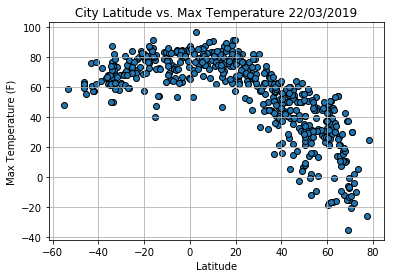

In [34]:
# Scatterplot for Latitude vs Max Temp
plt.scatter(weather_df["Lat"], weather_df["Max_Temp"], marker="o",edgecolor="black")

# Labels
plt.title(f"City Latitude vs. Max Temperature {today_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ellis/Downloads/lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

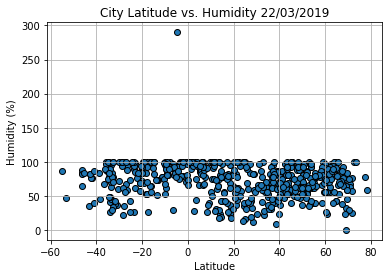

In [35]:
# Scatterplot for Latitude vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o",edgecolor="black")

# Labels
plt.title(f"City Latitude vs. Humidity {today_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ellis/Downloads/lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

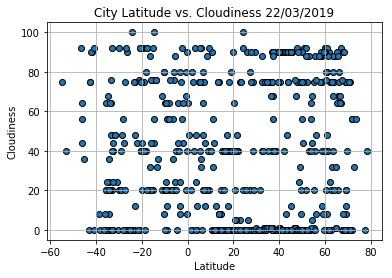

In [36]:
# Scatterplot for Latitude vs Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o",edgecolor="black")

# Labels
plt.title(f"City Latitude vs. Cloudiness {today_date}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ellis/Downloads/lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

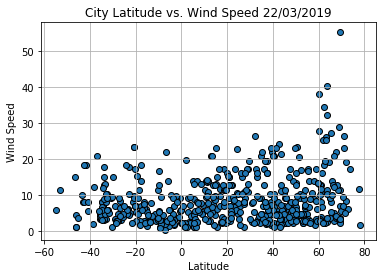

In [37]:
# Scatterplot for Latitude vs Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind_Speed"], marker="o",edgecolor="black")

# Labels
plt.title(f"City Latitude vs. Wind Speed {today_date}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ellis/Downloads/lat_vs_wind.png")

# Show plot
plt.show()